In [1]:
import csv
import yfinance as yf
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# Testing a simple trading statrgy for equity(here for 20 years) assuming that aasset was traded for period of 20 years
#Stategy - ENTER STRATEGY: when 7day(EMA) crosses above 105day(EMA) then buy the asset and EXIT STRATEGY:  when 7day(EMA)
# is below 150day(EMA) the sell the asset( with the stop loss of 5%)

In [3]:
data = yf.download('AMZN', start="2001-03-17", end="2021-03-17")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-03-16,10.6250,11.0625,10.2500,11.0000,11.0000,6984200
2001-03-19,11.1875,11.3125,10.1250,10.5000,10.5000,6774500
2001-03-20,10.5625,11.5000,10.1250,10.2500,10.2500,6294700
2001-03-21,10.3750,10.4375,10.0000,10.0000,10.0000,5506600
2001-03-22,10.0625,10.2500,9.5625,10.1875,10.1875,6594600


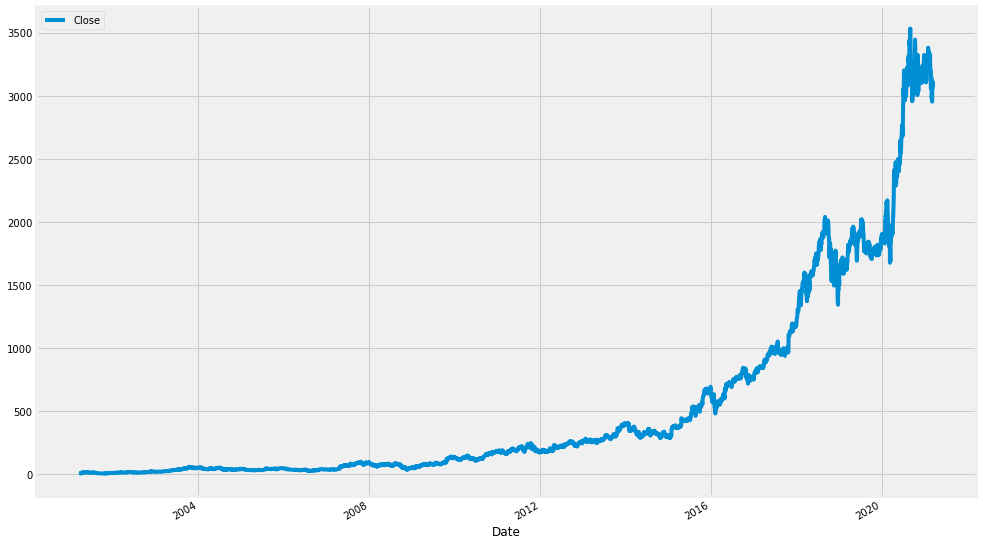

In [5]:
#visualization
plt.figure(figsize=(10,5))
data['Close'].plot(figsize=(15,10))
plt.legend()
plt.show()


In [6]:
#Moving Average Convergence Divergence (MACD)
#Moving Average Convergence Divergence or MACD  is one of the simplest and effective trend-following momentum indicators.
#We can trigger the trading signal using MACD series and signal series.
#Strategy is when short term EMA crosses the long term EMA, this may indicate a buy signal(golden cross) 
# or when the short term moving average crosses below the long term moving average, it may be a good moment to sell.
#When the MACD line crosses above the signal line, then it is recommended to buy the underlying security.
#When the MACD line crosses below the signal line, then a signal to sell is triggered.

In [7]:
#The formula for the Exponential Moving Average(EMA) is given below:

#EMA = (Closing price - EMA*(previous day)) x multiplier  +  EMA*(previous day)

# where Weightage multiplier = 2 / (moving average period +1)
#Pandas support in-built function to calculate exponential weighted average (ewm), we use it to calculate EMA

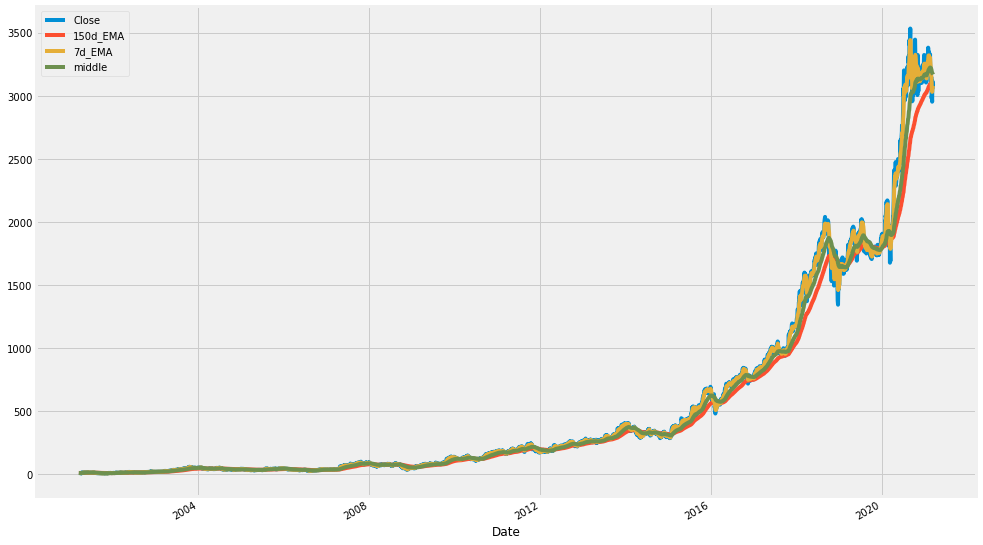

In [8]:
# Calculate exponential moving average
data['7d_EMA'] = data.Close.ewm(span=7, adjust=False).mean()
data['150d_EMA'] = data.Close.ewm(span=150, adjust=False).mean()
data['middle'] = data.Close.ewm(span=71, adjust=False).mean()
data[['Close','150d_EMA','7d_EMA','middle']].plot(figsize=(15,10))
plt.show()

In [9]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume,7d_EMA,150d_EMA,middle
Date,,,,,,,,,
2001-03-16,10.6250,11.0625,10.2500,11.0000,11.0000,6984200,11.000000,11.000000,11.000000
2001-03-19,11.1875,11.3125,10.1250,10.5000,10.5000,6774500,10.875000,10.993377,10.986111
2001-03-20,10.5625,11.5000,10.1250,10.2500,10.2500,6294700,10.718750,10.983531,10.965664
2001-03-21,10.3750,10.4375,10.0000,10.0000,10.0000,5506600,10.539062,10.970505,10.938840
2001-03-22,10.0625,10.2500,9.5625,10.1875,10.1875,6594600,10.451172,10.960134,10.917969


In [18]:
#creating a function when to buy/sell the asset
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['7d_EMA'][i] > data['150d_EMA'][i]:   # signaling us to buy i.e Entering the market(Enter Strategy)
            if flag!= 1:
                sigPriceBuy.append(data['Adj Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['7d_EMA'][i] < data['150d_EMA'][i]:   # signalling us to sell i.e Exit the market(Exit strategy ) 
            if flag!= 0:
                # set stop loss to 5%
                stop_loss = data['Adj Close'][i] - (data['Adj Close'][i] * 0.05)
                sigPriceSell.append(stop_loss)
                sigPriceBuy.append(np.nan)
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)     

In [19]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,7d_EMA,150d_EMA,middle,Buy_Signal_Price,Sell_Signal_Price,macd,macdsignal,trading_signal,returns,strategy_returns
Date,,,,,,,,,,,,,,,,
2001-03-16,10.6250,11.0625,10.2500,11.0000,11.0000,6984200,11.000000,11.000000,11.000000,NaN,NaN,0.000000,0.000000,-1,NaN,NaN
2001-03-19,11.1875,11.3125,10.1250,10.5000,10.5000,6774500,10.875000,10.993377,10.986111,NaN,9.975,-0.118377,-0.003288,-1,-0.045455,0.045455
2001-03-20,10.5625,11.5000,10.1250,10.2500,10.2500,6294700,10.718750,10.983531,10.965664,NaN,NaN,-0.264781,-0.010552,-1,-0.023810,0.023810
2001-03-21,10.3750,10.4375,10.0000,10.0000,10.0000,5506600,10.539062,10.970505,10.938840,NaN,NaN,-0.431442,-0.022243,-1,-0.024390,0.024390
2001-03-22,10.0625,10.2500,9.5625,10.1875,10.1875,6594600,10.451172,10.960134,10.917969,NaN,NaN,-0.508962,-0.035763,-1,0.018750,-0.018750


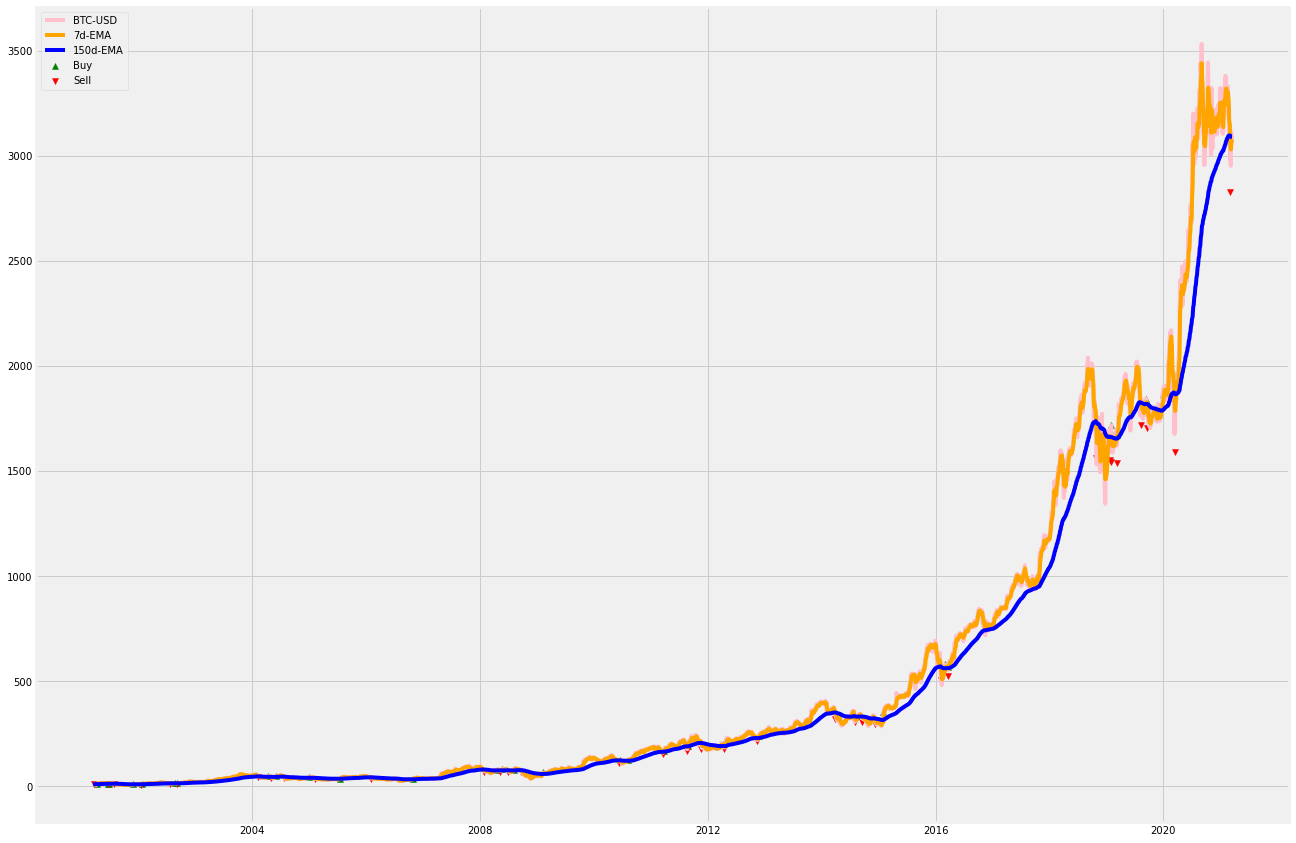

In [26]:
#visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(20,15))
plt.grid(True)
plt.plot(data['Adj Close'], label = 'BTC-USD', color = 'pink')
plt.plot(data['7d_EMA'], label = '7d-EMA', color = 'orange')
plt.plot(data['150d_EMA'], label = '150d-EMA', color = 'blue')
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker ='^', color = 'green', alpha = 1)
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker ='v', color = 'red', alpha = 1)
plt.legend(loc= 'upper left')
plt.show()

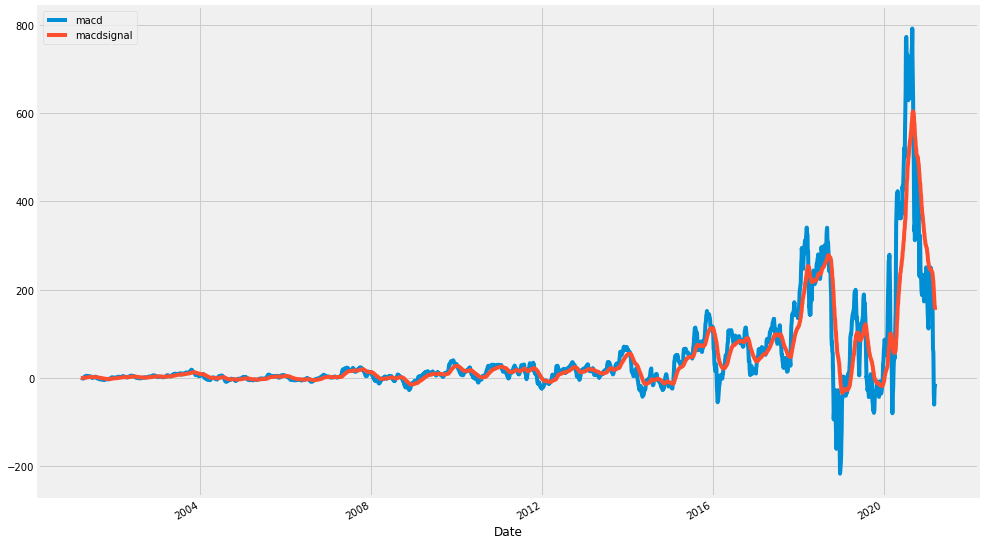

In [29]:
# Calculate MACD
data['macd'] = data['7d_EMA'] - data['150d_EMA'] 

# Calculate Signal
data['macdsignal'] = data.macd.ewm(span=71, adjust=False).mean()

# trading signal
data['trading_signal'] = np.where(data['macd'] > data['macdsignal'], 1, -1)
data[['macd','macdsignal']].plot(figsize=(15,10))
plt.show()

In [31]:
# Calculate the annualised volatility
annual_volatility = data.strategy_returns.std() * np.sqrt(252) * 100

'The annualised volatility is %.2f%%' % annual_volatility

'The annualised volatility is 46.09%'